In [1]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect,func

In [5]:
postgresql= ("sqlite:///Resources/hawaii.sqlite")
engine = create_engine(postgresql)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'])

id
station
name
latitude
longitude
elevation


In [10]:
columns = inspector.get_columns('measurement')
for s in columns:
    print(s['name'])

id
station
date
prcp
tobs


In [11]:
engine.execute('SELECT date, prcp FROM measurement').fetchall()

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
year_prct = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(year_prct)

('2017-08-23',)


In [15]:

# Calculate the date 1 year ago from the last data point in the database
yearback= dt.date(2017,8,23)-dt.timedelta(days= 365)
yearback

datetime.date(2016, 8, 23)

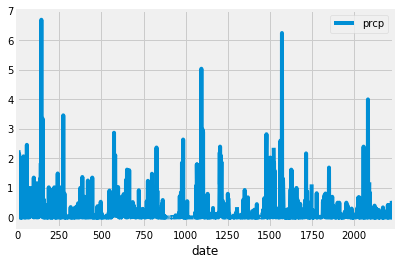

In [140]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= yearback).order_by(Measurement.date).all()

date = [date_prcp[1]  for d in date_prcp[:]]
prcp = [date_prcp[2] for p in date_prcp[:]]

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(date_prcp)
prcp_df.head()

# Sort the dataframe by date
prcp_df.set_index('date').head()
# Use Pandas Plotting with Matplotlib to plot the data
#fig, ax = plt.subplots()
##xpos = range(1, len(date)+1)
#ax.bar(xpos, date[::-1])
#ax.set_xlabel(date)
#ax.set_ylabel(inches)
#ax.set_yticks(ypos)
#ax.set_yticklabels(prcp[::-1])
#fig.tight_layout()
#plt.show()

ax =prcp_df.plot()
plt.xlabel('date')
plt.show()

![precipitation](Images/precipitation.png)

In [141]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_stats = prcp_df.prcp.describe()
prcp_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Station.station).count()
station_count

9

In [19]:
#stations = session.query(Measurement)
#for s in stations:
 #   print(s.station)
    


In [42]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#station_distinct = session.query(Measurement.station).\
#order_by(Measurement.station).\
#filter(Measurement.station).distinct()
#station_distinct.all()

[]

In [120]:
stationdata=session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for s in stationdata:
   print(s)
              
#stationdata= session.query(Measurement.station)
#for s in stationdata:
#   print(s)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [107]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
temp_min =session.query(Measurement.station, func.min(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
temp_min





[('USC00519281', 54.0)]

In [106]:
# highest temperature recorded, 
temp_max =session.query(Measurement.station, func.max(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
temp_max



[('USC00519281', 85.0)]

In [136]:
#average temperature of the most active station?
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
avg_temp

   # order_by(func.sum(Measurement.tobs)).all()

[('USC00519281', 71.66378066378067)]

In [139]:
#all the temps in one query
temps =session.query(Measurement.station, func.min(Measurement.tobs),
                     func.max(Measurement.tobs),
                     func.avg(Measurement.tobs)).\
                     filter(Measurement.station == 'USC00519281').all()
temps
                                                                                                    

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [144]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#yearback

highobs =session.query(Measurement.station,(Measurement.tobs)).\
                        filter(Measurement.date >=yearback).\
                     filter(Measurement.station == 'USC00519281').all()
highobs_df = pd.DataFrame(highobs, columns=['station', 'tobs'])
highobs_df.set_index('station')


,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
...,...
USC00519281,77.0
USC00519281,77.0
USC00519281,76.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CA8D836788>]],
      dtype=object)

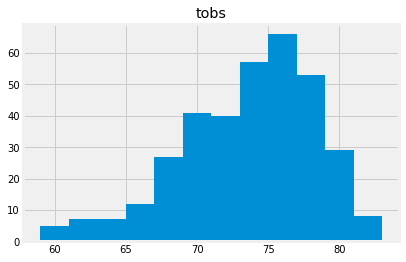

In [145]:
highobs_df.hist(bins=12)

![precipitation](Images/station-histogram.png)

In [151]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [156]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.date(2018,2,28)-dt.timedelta(days= 365)
end_date = dt.date(2018,3,5)-dt.timedelta(days= 365)
tmin,tavg,tmax = calc_temps(start_date, end_date)[0]
print(tmin,tavg,tmax)

                                          
                                          



64.0 72.02777777777777 78.0


C:\Users\water\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


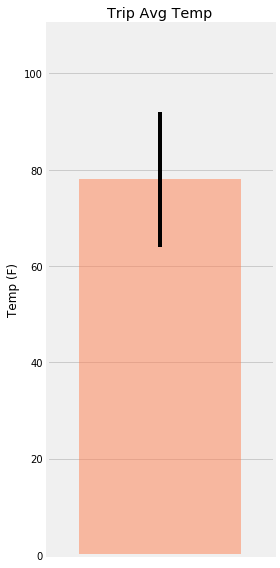

In [157]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin
bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
# fig.autofmt_xdate()
fig.tight_layout()
fig.show()

In [161]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


something = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,
                        func.sum(Measurement.prcp)).\
                        filter(Measurement.station == Station.station).\
                        filter(Measurement.date >= '2017-02-28').\
                        filter(Measurement.date <= '2017-03-05').\
                        group_by(Station.name).\
                        order_by(func.sum(Measurement.prcp).desc()).all()
something



[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  4.720000000000001),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 4.45),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  4.07),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 2.98),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  2.7399999999999998),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.32),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.1600000000000001)]

## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [30]:
# Plot the daily normals as an area plot with `stacked=False`
